# Seasonality 
 As we saw on the plots obtained with `explore_content` and expected from environmental/atmospheric variables from a place outside the tropics, there seem to be a strong seasonality component.


 We could use `filter_df`to extract the data from the dates that we expect to be of a season, but instead we will use the method `group_by`

## Temperature

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
Data=pd.read_csv("../../data/Time_series_DATA.txt",skiprows=149,index_col=0)
Data=Data.drop(columns=['Predicted ice thickness [m]','Noisy predicted ice thickness [m]'])
#Data=pd.read_csv('https://raw.githubusercontent.com/iceclassic/sandbox/main/Data/Time_series_DATA.txt',index_col=0,skiprows=149)
Data.index = Data.index.astype(str).str.split().str[0]
Data.index = pd.to_datetime(Data.index, format="%Y-%m-%d")


In [43]:
def yearly_distribution(df):
    """
    Plot the yearly distribution of temperature data.

    Parameters:
    df (DataFrame): The input DataFrame containing temperature data.
   

    Returns:
    None
    """
    fig, ax = plt.subplots(len(df.columns), 1, figsize=(15, 5 * len(df.columns)))

    for i, col in enumerate(df.columns):
        if col != "Days since start of year":
            # Calculate the average temperature per day of the year
            average = df.groupby('Days since start of year')[col].mean()
            ax[i].scatter(df['Days since start of year'], df[col], marker='.', label=col,color='orangered')
            ax[i].plot(average, color='b', marker='.', label='Average')

            ax[i].set_ylabel(f'{col})')
            ax[i].set_title(f'{col})')
            ax[i].legend()
        
            ax[i].set_xlabel('Days since start of year')

    plt.tight_layout()
    plt.show()

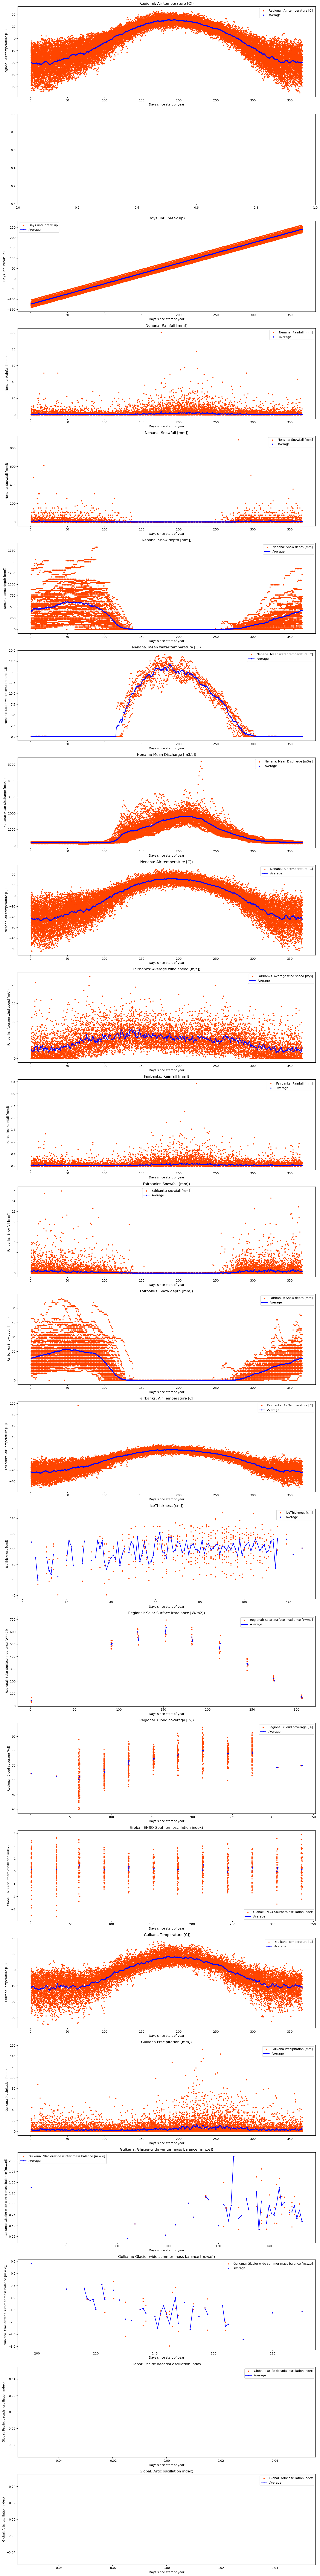

In [44]:
yearly_distribution(Data)